# Chip-Seq Data Analysis


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe as bf
import pandas as pd
import numpy as np
from upsetplot import from_indicators

In [4]:
##load all excel spreadsheets in
df_ES2i = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S5.xlsx', header = 3)
df_ESS = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S6.xlsx', header = 3)
df_NPC = pd.read_excel(r'~/Documents/research_work/Supplemental_Table_S7.xlsx', header = 3)


In [ ]:
##create graphical version of score, p-Value, q-Value, signalValue, 
##df_score_signalvalue = pd.DataFrame(df, columns= ['score','signalValue'])
##df_pvalue_qvalue = pd.DataFrame(df, columns= ['pvalue','qValue'])
##df_signalvalue_qvalue = pd.DataFrame(df, columns= ['signalvalue','qValue'])
##df_signalvalue_pvalue = pd.DataFrame(df, columns= ['signalvalue','pValue'])
##df_score_qvalue = pd.DataFrame(df, columns= ['score','qValue'])
##df_score_pvalue = pd.DataFrame(df, columns= ['signalvalue','pValue'])

0

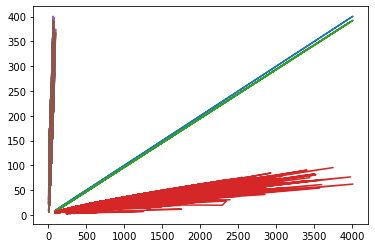

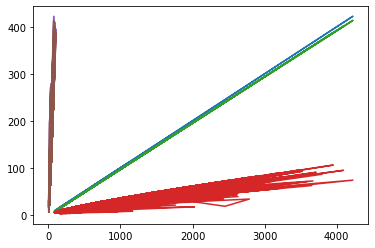

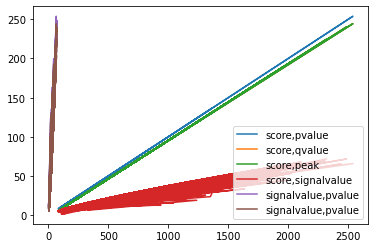

In [53]:
### function to create graphical version of score, pValue, qValue, signalValue, 
def var_analysis(list_of_dfs):
    for df in list_of_dfs:
        score = pd.DataFrame(df, columns= ['score'])
        pvalue = pd.DataFrame(df, columns= ['pValue'])
        signalvalue = pd.DataFrame(df, columns= ['signalValue'])
        qvalue = pd.DataFrame(df, columns= ['qValue'])
        peak = pd.DataFrame(df, columns= ['qValue'])
        fig, ax = plt.subplots()
        ax.plot(score, pvalue, label = "score,pvalue")
        ax.plot(score, qvalue, label = "score,qvalue")
        ax.plot(score, peak, label = "score,peak")
        ax.plot(score, signalvalue, label = "score,signalvalue")
        ax.plot(signalvalue, pvalue, label = "signalvalue,pvalue")
        ax.plot(signalvalue, qvalue, label = "signalvalue,pvalue")
    leg = ax.legend()
    return 0

list_of_dfs = [df_ES2i, df_ESS, df_NPC]
var_analysis(list_of_dfs)



In [7]:
##test cases - fails for when they are the same values btwn multiple cases 
df1 = pd.DataFrame([
    ['chr1', 3, 6],
    ['chr1', 4, 7]],
    columns=['#chr', 'start', 'end']
)

df2 = pd.DataFrame([
    ['chr1', 3, 6]],
    columns=['#chr', 'start', 'end']
)

df3 = pd.DataFrame([
    ['chr1', 8, 9],
    ['chr1', 3, 5]],
    columns=['#chr', 'start', 'end']
)


### function to create matrix for upset plot - results are duplicated (maybe that is right)
def make_indicators(list_of_dfs):
    name_arr = ['ES2i', 'ESSerum', 'NPC']
    num_df = len(list_of_dfs)
    df_tot = pd.concat(list_of_dfs) 
    print (df_tot)
    i = 0
    j = 0 
    for df in list_of_dfs:
        #if any given interval in df_tot overlaps any interval in df
        df_tot = bf.count_overlaps(df_tot, df,
                                             cols1=['#chr','start','end'], cols2=['#chr','start','end'])
        df_tot['count'] = df_tot['count'].astype(bool)
        df_tot.rename(columns={'count':name_arr[i]},inplace=True)
        i = i + 1
    return df_tot
#df_es_2i1_ctcf,df_es_serum_ctcf,df_npc1_ctcf
list_of_dfs = [df_ES2i,df_ESS,df_NPC]
overlap_indicators = make_indicators(list_of_dfs)
overlap_indicators = overlap_indicators.drop(labels=["Unnamed: 9", "Unnamed: 10"], axis=1)
##dataframe results in rows "50185" and "28860" - I tried to drop those names, but I am unable to do so
display (overlap_indicators)
##overlap_indicators = overlap_indicators.drop(labels=["#chr", "start","end"], axis=1)

       #chr      start        end  \
0      chr1    3002708    3002871   
1      chr1    4132662    4132954   
2      chr1    4163475    4163685   
3      chr1    4218330    4218547   
4      chr1    4322616    4322910   
...     ...        ...        ...   
28855  chrX  166236954  166237110   
28856  chrX  166300933  166301115   
28857  chrX  166417046  166417363   
28858  chrX  166424734  166425255   
28859  chrX  166428065  166428396   

                                                    name  score  signalValue  \
0      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    170      9.50311   
1      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    631     24.46086   
2      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    239     12.14286   
3      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    357     16.36646   
4      Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    436     19.00621   
...                                                  ...    ...          ..

,#chr,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC
0,chr1,3002708,3002871,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,170,9.50311,17.04867,14.64283,49,NaN,NaN,True,True,False
1,chr1,4132662,4132954,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,631,24.46086,63.14300,60.10382,144,NaN,NaN,True,True,False
2,chr1,4163475,4163685,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,239,12.14286,23.90226,21.38447,65,NaN,NaN,True,False,False
3,chr1,4218330,4218547,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,357,16.36646,35.79780,33.11425,103,NaN,NaN,True,True,False
4,chr1,4322616,4322910,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,436,19.00621,43.69802,40.90810,146,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135178,chrX,166236954,166237110,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,191,10.48681,19.14016,16.23458,73,NaN,NaN,True,False,True
135179,chrX,166300933,166301115,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,304,15.00000,30.41432,27.27226,68,NaN,NaN,False,True,True
135180,chrX,166417046,166417363,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,445,12.74958,44.51430,41.07328,205,NaN,NaN,True,True,True
135181,chrX,166424734,166425255,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,938,12.65306,93.85211,89.16364,371,NaN,NaN,True,True,True


In [8]:
#Subsetting the Data as Necessary

##I could be doing this wrong, because output is always resulting in same thing. 
es2i_ess= overlap_indicators[(overlap_indicators['ES2i'] == True) & (overlap_indicators['ESSerum'] == True) & (overlap_indicators['NPC'] == False)]
display(es2i_ess)


npc_ess= overlap_indicators[(overlap_indicators['NPC'] == True) & (overlap_indicators['ESSerum'] == True) & (overlap_indicators['ES2i'] == False)]
display(npc_ess)

es2i_npc = overlap_indicators[(overlap_indicators['ES2i'] == True) & (overlap_indicators['NPC'] == True) & (overlap_indicators['ESSerum'] == False)]
display(es2i_npc)

tot = overlap_indicators[(overlap_indicators['ES2i'] == True) & (overlap_indicators['NPC'] == True) & (overlap_indicators['ESSerum'] == True)]
display(tot)




,#chr,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC
0,chr1,3002708,3002871,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,170,9.50311,17.04867,14.64283,49,NaN,NaN,True,True,False
1,chr1,4132662,4132954,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,631,24.46086,63.14300,60.10382,144,NaN,NaN,True,True,False
3,chr1,4218330,4218547,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,357,16.36646,35.79780,33.11425,103,NaN,NaN,True,True,False
7,chr1,4406799,4407149,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,1220,36.08108,122.04403,118.14900,190,NaN,NaN,True,True,False
8,chr1,4482037,4482366,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,413,13.93476,41.35657,38.60170,173,NaN,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106298,chrX,163667150,163667464,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,455,15.00000,45.59313,42.80155,152,NaN,NaN,True,True,False
106304,chrX,165022355,165022543,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,204,10.72072,20.48893,18.02203,80,NaN,NaN,True,True,False
106320,chrY,556503,556743,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,333,15.31532,33.37428,30.73152,141,NaN,NaN,True,True,False
106321,chrY,2781663,2782028,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,958,5.14370,95.85614,92.42959,193,NaN,NaN,True,True,False


,#chr,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC
56303,chr1,16736197,16736365,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,173,9.11023,17.33009,14.92157,87,NaN,NaN,False,True,True
56333,chr1,20296353,20296553,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,318,14.80481,31.87844,29.25398,94,NaN,NaN,False,True,True
56368,chr1,21950781,21950973,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,191,10.21021,19.14751,16.70476,100,NaN,NaN,False,True,True
56370,chr1,21957310,21957502,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,260,12.76276,26.04730,23.49872,121,NaN,NaN,False,True,True
56415,chr1,25528528,25528780,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,303,14.29430,30.39728,27.79144,120,NaN,NaN,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135030,chrX,140431400,140431551,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,145,8.70307,14.51884,11.71631,47,NaN,NaN,False,True,True
135059,chrX,148787496,148787642,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,214,11.60410,21.49603,18.53788,60,NaN,NaN,False,True,True
135130,chrX,158891843,158891966,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,145,7.70270,14.52881,11.72079,54,NaN,NaN,False,True,True
135157,chrX,162853395,162853520,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,172,9.86348,17.23676,14.36875,92,NaN,NaN,False,True,True


,#chr,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC
17,chr1,5007950,5008334,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,710,25.53937,71.07504,67.92787,151,NaN,NaN,True,False,True
358,chr1,34154540,34154724,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,186,8.12500,18.62128,16.18843,116,NaN,NaN,True,False,True
564,chr1,40676014,40676250,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,280,12.16216,28.04966,25.47221,121,NaN,NaN,True,False,True
611,chr1,43819543,43819784,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,401,17.76360,40.18303,37.44613,115,NaN,NaN,True,False,True
690,chr1,52356583,52356748,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,132,7.91925,13.20901,10.88554,107,NaN,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135164,chrX,163727605,163727811,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,335,16.15385,33.56307,30.35425,115,NaN,NaN,True,False,True
135169,chrX,165097866,165098019,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,197,8.43750,19.71158,16.79293,66,NaN,NaN,True,False,True
135175,chrX,165737635,165737820,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,213,11.53846,21.38317,18.42955,74,NaN,NaN,True,False,True
135177,chrX,165876673,165876841,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,200,11.02389,20.05368,17.12365,58,NaN,NaN,True,False,True


,#chr,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC
4,chr1,4322616,4322910,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,436,19.00621,43.69802,40.90810,146,NaN,NaN,True,True,True
5,chr1,4336243,4336641,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,709,23.91892,70.95467,67.81041,234,NaN,NaN,True,True,True
6,chr1,4372961,4373224,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,404,17.95031,40.49982,37.75039,128,NaN,NaN,True,True,True
9,chr1,4506639,4506962,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,538,15.00000,53.81987,50.89968,200,NaN,NaN,True,True,True
10,chr1,4758433,4758805,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,1522,47.06397,152.20918,147.84914,208,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135174,chrX,165523904,165524073,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,259,13.34471,25.94595,22.89184,80,NaN,NaN,True,True,True
135176,chrX,165742002,165742166,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,351,16.73077,35.16054,31.91577,59,NaN,NaN,True,True,True
135180,chrX,166417046,166417363,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,445,12.74958,44.51430,41.07328,205,NaN,NaN,True,True,True
135181,chrX,166424734,166425255,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,938,12.65306,93.85211,89.16364,371,NaN,NaN,True,True,True


In [12]:
#function to store only chr, start, end
def clean_df (df): 
    df.rename(columns={'#chr':'chrom'},inplace=True)
    ##df_edit = df[['chrom','start', 'end']]
    return df
es2i_ess_edit = clean_df(es2i_ess)
print(es2i_ess_edit)



       chrom      start        end  \
0       chr1    3002708    3002871   
1       chr1    4132662    4132954   
3       chr1    4218330    4218547   
7       chr1    4406799    4407149   
8       chr1    4482037    4482366   
...      ...        ...        ...   
106298  chrX  163667150  163667464   
106304  chrX  165022355  165022543   
106320  chrY     556503     556743   
106321  chrY    2781663    2782028   
106322  chrY    2890825    2891321   

                                                     name  score  signalValue  \
0       Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    170      9.50311   
1       Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    631     24.46086   
3       Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    357     16.36646   
7       Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...   1220     36.08108   
8       Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...    413     13.93476   
...                                                   ...

/Users/vbchavali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
##function that stores new max pValue
##no clue why it won't work 
def pick_high_p_value(df):
    df_edit = df[['#chr','start', 'end']]
    check = df.duplicated()
    for i in df:
        chr1 = df['#chr']
        start1 = df['start']
        stop1 = df['end']
        pval1 = df['pValue']
        
        for j in df: 
            chr2 = df['#chr']
            start2 = df['start']
            stop2 = df['end']
            pval2 = df['pValue']
            print(chr1)
            print(chr2)
            print(start1)
            print(start2)
            print(stop1)
            print(stop2)
            if (chr1 == chr2) and (start1 == start2) and (stop1 == stop2):
                df[pval] = max(pval1, pval2)
                
    return df

pick_high_p_value(es2i_ess)

KeyError: "['#chr'] not in index"

In [13]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14],
    ],
    columns=['chrom', 'start', 'end']`
)



df_annotated = bf.cluster(es2i_ess_edit, min_dist=0)
display(df_annotated)
##bf.vis.plot_intervals(df_annotated, labels=df_annotated['cluster'], show_coords=True, xlim=(0,16))
##bf.vis.plot_intervals(df1, show_coords=True, xlim=(0,16))


,chrom,start,end,name,score,signalValue,pValue,qValue,peak,50185,28860,ES2i,ESSerum,NPC,cluster,cluster_start,cluster_end
0,chr1,3002708,3002871,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,170,9.50311,17.04867,14.64283,49,NaN,NaN,True,True,False,0,3002642,3002871
1,chr1,4132662,4132954,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,631,24.46086,63.14300,60.10382,144,NaN,NaN,True,True,False,1,4132637,4132980
2,chr1,4218330,4218547,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,357,16.36646,35.79780,33.11425,103,NaN,NaN,True,True,False,2,4218321,4218633
3,chr1,4406799,4407149,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,1220,36.08108,122.04403,118.14900,190,NaN,NaN,True,True,False,3,4406727,4407194
4,chr1,4482037,4482366,Project004-IPSHOCH-Exp5-ChIP-ES-2i-CTCF-IP-Blo...,413,13.93476,41.35657,38.60170,173,NaN,NaN,True,True,False,4,4482005,4482434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40302,chrX,163667150,163667464,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,455,15.00000,45.59313,42.80155,152,NaN,NaN,True,True,False,20173,163667150,163667497
40303,chrX,165022355,165022543,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,204,10.72072,20.48893,18.02203,80,NaN,NaN,True,True,False,20174,165022338,165022543
40304,chrY,556503,556743,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,333,15.31532,33.37428,30.73152,141,NaN,NaN,True,True,False,20175,556503,556763
40305,chrY,2781663,2782028,Project004-IPSHOCH-Exp5-ChIP-ES-CTCF-IP-Blobel...,958,5.14370,95.85614,92.42959,193,NaN,NaN,True,True,False,20176,2781654,2782065


df_annotated = bf.cluster(es2i_ess_edit, min_dist=0)
display(df_annotated)
#bf.vis.plot_intervals(df_annotated, labels=df_annotated['cluster'], show_coords=True, xlim=(0,16))


Key Findings: 
Should cluster start and end not be either start or end value of overlapping areas? 
How many clusters should I have? Should it be the same number of total values in the venn diagram? 


#Questions: 
How to eliminate 50185 and 28860? I tried the drop function, but it does not recognize them. This creates an error in the bed format. 
Can I replace start and end values with cluster start and end values and run motif discovery?

In [14]:
from gimmemotifs.comparison import MotifComparer
from gimmemotifs.motif import motif_from_consensus
from gimmemotifs.motif import read_motifs

In [11]:
motifs = [
    motif_from_consensus("CCACCAGGGGGCGC"),
    ##Only motif from JASPAR
]

mc = MotifComparer()
results = mc.get_closest_match(motifs, dbmotifs=read_motifs("HOMER"), metric="seqcor")

# Load motifs
db = read_motifs("HOMER", as_dict=True)

for motif in motifs:
    match, scores = results[motif.id]
    print("{}: {} - {:.3f}".format(motif.id, match, scores[0]))
    dbmotif = db[match]
    orient = scores[2]
    if orient == -1:
        dbmotif = dbmotif.rc()
    padm, padd = 0, 0
    if scores[1] < 0:
        padm = -scores[1]
    elif scores[1] > 0:
        padd = scores[1]
    print(" " * padm + motif.to_consensus())
    print(" " * padd + dbmotif.to_consensus())
    print()

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/vbchavali/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/vbchavali/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
